In [30]:
#  Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [31]:
# declare each array as variable so latitudes and longitudes can be stored for later use

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

#Create set of randome latitude and longitude combinations

lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [32]:
# zip object packs lats and lngs having the same index in their respective array into a tuple

# Add the lats and lngs to a list

coordinates = list(lat_lngs)

In [33]:
# Use the citipy module to determine city based on latitude and longitude.

from citipy import citipy
# import the requests library

import requests

# import api key

from config import weather_api_key

In [34]:
# Create list to hold the cities

cities = []

# ID the nearest city for each lat and lng combo 

for coordinate in coordinates: 
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, the add to our cities list
    
    if city not in cities:
        cities.append(city)
        
# print the city count to confirm sufficient count (1500)
len(cities)

619

In [35]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [36]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [37]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(.5)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | new norfolk
Processing Record 2 of Set 1 | pevek
Processing Record 3 of Set 1 | kodiak
Processing Record 4 of Set 1 | punta arenas
Processing Record 5 of Set 1 | rio verde de mato grosso
Processing Record 6 of Set 1 | manokwari
Processing Record 7 of Set 1 | san cristobal
Processing Record 8 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 9 of Set 1 | krasnoselkup
Processing Record 10 of Set 1 | atar
Processing Record 11 of Set 1 | kapaa
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | upington
Processing Record 14 of Set 1 | karachev
Processing Record 15 of Set 1 | batagay
Processing Record 16 of Set 1 | bom jardim
Processing Record 17 of Set 1 | mataura
Processing Record 18 of Set 1 | rawannawi
City not found. Skipping...
Processing Record 19 of Set 1 | wum
Processing Record 20 of Set 1 | pisco
Processing Record 21 of Set 1 | colborne
Processing Record 22 of Set 1 | lasa
Processing Record 23 of Set 1 | northam
Pro

Processing Record 40 of Set 4 | manuk mangkaw
Processing Record 41 of Set 4 | edd
Processing Record 42 of Set 4 | sataua
City not found. Skipping...
Processing Record 43 of Set 4 | saint-philippe
Processing Record 44 of Set 4 | hualmay
Processing Record 45 of Set 4 | port lincoln
Processing Record 46 of Set 4 | tual
Processing Record 47 of Set 4 | turtas
Processing Record 48 of Set 4 | santa lucia
Processing Record 49 of Set 4 | tolaga bay
Processing Record 50 of Set 4 | chuy
Processing Record 1 of Set 5 | savinka
Processing Record 2 of Set 5 | olaine
Processing Record 3 of Set 5 | kholodnyy
Processing Record 4 of Set 5 | jujuy
City not found. Skipping...
Processing Record 5 of Set 5 | nyurba
Processing Record 6 of Set 5 | saint-georges
Processing Record 7 of Set 5 | vardo
Processing Record 8 of Set 5 | ust-omchug
Processing Record 9 of Set 5 | waipawa
Processing Record 10 of Set 5 | umm lajj
Processing Record 11 of Set 5 | san patricio
Processing Record 12 of Set 5 | luancheng
Process

Processing Record 28 of Set 8 | mandurah
Processing Record 29 of Set 8 | skjervoy
Processing Record 30 of Set 8 | provideniya
Processing Record 31 of Set 8 | opelousas
Processing Record 32 of Set 8 | aksu
Processing Record 33 of Set 8 | illoqqortoormiut
City not found. Skipping...
Processing Record 34 of Set 8 | palora
Processing Record 35 of Set 8 | baykit
Processing Record 36 of Set 8 | gobabis
Processing Record 37 of Set 8 | goderich
Processing Record 38 of Set 8 | mackenzie
Processing Record 39 of Set 8 | chokurdakh
Processing Record 40 of Set 8 | kropotkin
Processing Record 41 of Set 8 | tessalit
Processing Record 42 of Set 8 | chumikan
Processing Record 43 of Set 8 | zaozerne
Processing Record 44 of Set 8 | vedaranniyam
City not found. Skipping...
Processing Record 45 of Set 8 | qinzhou
Processing Record 46 of Set 8 | teguise
Processing Record 47 of Set 8 | sao jose da coroa grande
Processing Record 48 of Set 8 | kahului
Processing Record 49 of Set 8 | matias barbosa
Processing R

Processing Record 16 of Set 12 | hobyo
Processing Record 17 of Set 12 | deputatskiy
Processing Record 18 of Set 12 | havoysund
Processing Record 19 of Set 12 | vitry-le-francois
Processing Record 20 of Set 12 | lamar
Processing Record 21 of Set 12 | fortuna
Processing Record 22 of Set 12 | nalut
Processing Record 23 of Set 12 | laerdalsoyri
Processing Record 24 of Set 12 | tungkang
City not found. Skipping...
Processing Record 25 of Set 12 | egvekinot
Processing Record 26 of Set 12 | vuktyl
Processing Record 27 of Set 12 | wattegama
Processing Record 28 of Set 12 | la orilla
Processing Record 29 of Set 12 | bac lieu
Processing Record 30 of Set 12 | portland
Processing Record 31 of Set 12 | cauquenes
Processing Record 32 of Set 12 | sur
Processing Record 33 of Set 12 | oranjemund
Processing Record 34 of Set 12 | anshun
Processing Record 35 of Set 12 | umzimvubu
City not found. Skipping...
Processing Record 36 of Set 12 | crestview
Processing Record 37 of Set 12 | tashtyp
Processing Reco

In [38]:
len(city_data)

569

In [39]:
# Convert the array into a Pandas DataFrame
import pandas as pd

In [40]:
# convert array of dict to a Pandas Df

city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,New Norfolk,-42.7826,147.0587,60.93,78,97,1.01,AU,2022-05-01 17:01:34
1,Pevek,69.7008,170.3133,-3.33,92,49,5.53,RU,2022-05-01 17:01:34
2,Kodiak,57.7900,-152.4072,40.51,81,100,17.27,US,2022-05-01 17:01:35
3,Punta Arenas,-53.1500,-70.9167,48.11,87,85,6.11,CL,2022-05-01 17:01:35
4,Rio Verde De Mato Grosso,-18.9181,-54.8442,92.44,26,0,8.12,BR,2022-05-01 17:01:35
5,Manokwari,-0.8667,134.0833,78.06,83,97,4.54,ID,2022-05-01 17:01:36
6,San Cristobal,7.7669,-72.2250,83.25,51,98,8.41,VE,2022-05-01 17:01:36
7,Krasnoselkup,65.7000,82.4667,28.45,82,99,18.90,RU,2022-05-01 17:01:37
8,Atar,20.5169,-13.0499,102.15,5,4,10.04,MR,2022-05-01 17:01:37
9,Kapaa,22.0752,-159.3190,73.11,85,20,21.85,US,2022-05-01 17:01:38


In [41]:
# rearrange the columns

new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,New Norfolk,AU,2022-05-01 17:01:34,-42.7826,147.0587,60.93,78,97,1.01
1,Pevek,RU,2022-05-01 17:01:34,69.7008,170.3133,-3.33,92,49,5.53
2,Kodiak,US,2022-05-01 17:01:35,57.7900,-152.4072,40.51,81,100,17.27
3,Punta Arenas,CL,2022-05-01 17:01:35,-53.1500,-70.9167,48.11,87,85,6.11
4,Rio Verde De Mato Grosso,BR,2022-05-01 17:01:35,-18.9181,-54.8442,92.44,26,0,8.12
5,Manokwari,ID,2022-05-01 17:01:36,-0.8667,134.0833,78.06,83,97,4.54
6,San Cristobal,VE,2022-05-01 17:01:36,7.7669,-72.2250,83.25,51,98,8.41
7,Krasnoselkup,RU,2022-05-01 17:01:37,65.7000,82.4667,28.45,82,99,18.90
8,Atar,MR,2022-05-01 17:01:37,20.5169,-13.0499,102.15,5,4,10.04
9,Kapaa,US,2022-05-01 17:01:38,22.0752,-159.3190,73.11,85,20,21.85


In [42]:
# Create an output file to save df as a csv in a new folder

output_data_file = 'weather_data/cities.csv'

# export City_data into a CSV

city_data_df.to_csv(output_data_file, index_label='City_ID')

In [43]:
# Extract relevant fields from the DF for plotting

lats = city_data_df['Lat']
max_temps = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df['Cloudiness']
wind_speed = city_data_df['Wind Speed']

In [44]:
# import time mod

import time

# Get today's date in secs

today = time.time()
today

1651424770.18163

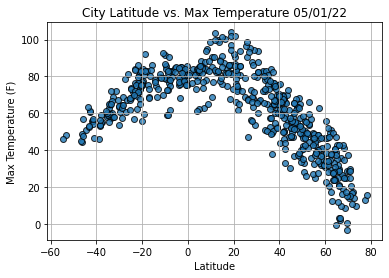

In [45]:
# import time mod

import time

# built scatter plot for Lat vs Lng

plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# add the other graph elements

plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure

plt.savefig('weather_data/Fig1.png')

#show the plot

plt.show()

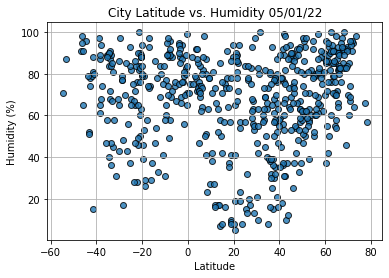

In [47]:
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# add the other graph elements

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure

plt.savefig('weather_data/Fig2.png')

#show the plot

plt.show()

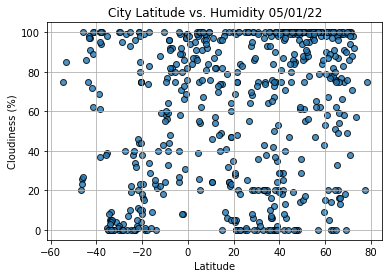

In [51]:
# refractor code, change y-axis variable to 'cloudiness' & y-axis label to 'Cloudiness (%)'

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# add the other graph elements

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure

plt.savefig('weather_data/Fig3.png')

#show the plot

plt.show()

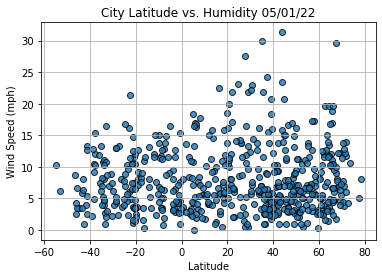

In [52]:
# refractor code, change y-axis variable to 'cloudiness' & y-axis label to 'Cloudiness (%)'

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# add the other graph elements

plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# save the figure

plt.savefig('weather_data/Fig4.png')

#show the plot

plt.show()